In [23]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

### Normal Equation

[0.0, 2.0, 0, 14]

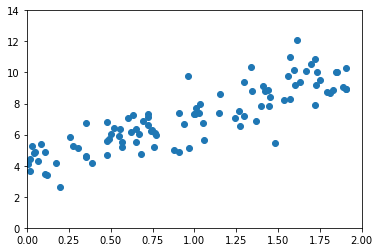

In [58]:
x = 2 * np.random.rand(100,1)
y = 4 + 3*x +np.random.randn(100,1)
plt.scatter(x,y)
plt.axis([0.,2.0,0,14])

In [59]:
x_b = np.c_[np.ones((100,1)), x]
theta_best = np.linalg.inv(x_b.T@x_b)@x_b.T@y
theta_best

array([[4.12152139],
       [3.04232005]])

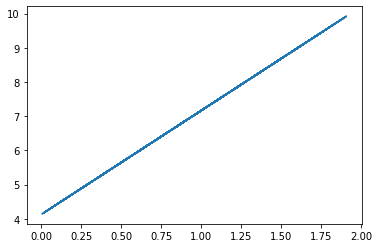

In [60]:
theta_best
plt.plot(x, theta_best[0,0]+theta_best[1,0]*x)

In [61]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b @ theta_best
y_predict

array([[ 4.12152139],
       [10.20616148]])

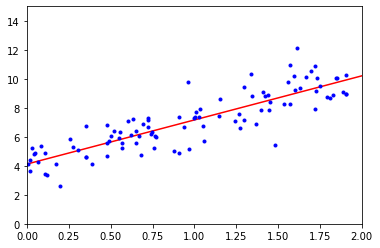

In [62]:
plt.plot(X_new, y_predict, "r-")
plt.plot(x, y, "b.")
plt.axis([0,2,0,15])
plt.show()

### sklearn Linear Model 

In [63]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
lin_reg.predict(X_new)

array([[ 4.12152139],
       [10.20616148]])

In [64]:
lin_reg.coef_, lin_reg.intercept_

(array([[3.04232005]]), array([4.12152139]))

### Gradient Descent step

$\theta_(next) = \theta - r*(gradient_\theta MSE(\theta))$

$r = $ training rate 
$gradient_\theta MSE(\theta) = \frac{2}{m}X^T*(X*\theta-y)$

In [65]:
eta = 0.1
n_iterations = 10000
m = 100

theta = np.random.rand(2,1) #starting point

for iteration in range(n_iterations):
    gradients = 2/m*x_b.T@(x_b@theta-y)
    theta = theta-eta*gradients
    


In [66]:
theta

array([[4.12152139],
       [3.04232005]])

### Stochastic Gradient Descent
Instead of using all of X_i, picking single X_i for each step
to calculate the gradient.

Changing learning rate (large -> small)as iteration goes (learning schedule) 

So computation speed is faster 

In [67]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t+t1)

theta = np.random.rand(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T@(xi@theta-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients 
theta

array([[4.0831563 ],
       [3.03230377]])

In [68]:
x_test = np.array([[1,2],[2,3]])
x_test[0], x_test[0:1]

(array([1, 2]), array([[1, 2]]))

### SGD in sklearn

the number of iterations, penalty term(regulalization), the initial training rate(eta)

In [72]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty=None, eta0=0.1)
sgd_reg.fit(x,y.ravel())
sgd_reg.coef_, sgd_reg.intercept_

(array([3.00778958]), array([4.08092073]))

### Mini-Batch Gradient Descent
use some(not single or all) of x_i to compute gradients 

### Comparison
m= num instances
n= num features

In [73]:
chart = pd.DataFrame({"Algorithm": ["Normal Equation", "Batch GD", "Stocastic GD", "Mini-batch GD"],
                     "Large m":["Fast", "Slow", "Fast", "Fast"],
                     "Out-of-core-support(gpu?)": ["No","No", "Yes","Yes"],
                     "Large n":["Slow", "Fast", "Fast", "Fast"],
                     "Hyperparams":["0","2",">=2", ">=2"],
                     "Scaling required":["No", "Yes", "Yes", "Yes"],
                     "sklearn": ["LinearRegression", "no", "SGDRegressor", "no"]}).set_index("Algorithm")

In [74]:
chart

,Large m,Out-of-core-support(gpu?),Large n,Hyperparams,Scaling required,sklearn
Algorithm,,,,,,
Normal Equation,Fast,No,Slow,0,No,LinearRegression
Batch GD,Slow,No,Fast,2,Yes,no
Stocastic GD,Fast,Yes,Fast,>=2,Yes,SGDRegressor
Mini-batch GD,Fast,Yes,Fast,>=2,Yes,no


### Polynomial Regression

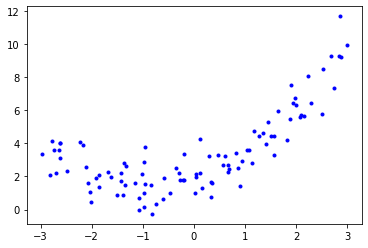

In [75]:
m = 100
X = 6*np.random.rand(m,1)-3
y = 0.5 * X**2 + X + 2+np.random.randn(m,1)
plt.plot(X,y, "b.")

In [87]:
X_nor = np.c_[np.ones((m,1)), X, X**2]
theta_best = np.linalg.inv(X_nor.T@X_nor)@X_nor.T@y 
theta_best

array([[1.86386454],
       [0.98064506],
       [0.56166165]])

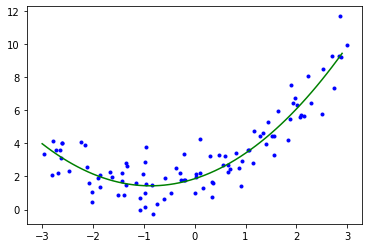

In [82]:
x_vec = np.arange(-3,3,0.1)
y_vec = theta_best[0]+theta_best[1]*x_vec+theta_best[2]*(x_vec**2)
plt.plot(X,y, "b.")
plt.plot(x_vec,y_vec,"g-")

In [86]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

##now it contains x^2
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

##If there were two features a,b, it would compute ab a^2b, ab^2 a and so on

(array([1.86386454]), array([[0.98064506, 0.56166165]]))

### learning curves

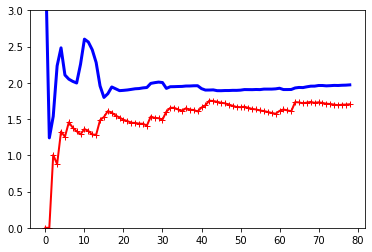

In [94]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
    train_errors, val_errors = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_test[:m])
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_test[:m], y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.ylim([0,3])
    
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

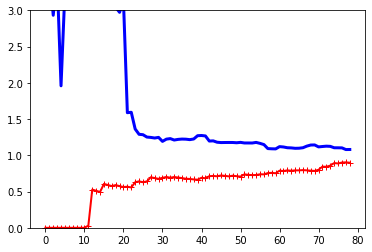

In [95]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("sgd_reg", LinearRegression()),
))

plot_learning_curves(polynomial_regression, X, y)

## Regularization

### Ridge Regression
$\hat \theta = (X^T*X+\alpha A)^{-1}*X^T*y$

where $A$ is an identity matrix with top-left=0

In [258]:
a = 1
A = np.identity(X.shape[1]+1)
A[0,0]=0
X_b = np.c_[np.ones((m,1)), X]
X_b
theta_r = np.linalg.inv(X_b.T@X_b+(a*A))@X_b.T@y
theta_r, theta_r[0]+theta_r[1]*1.5

(array([[3.41760311],
        [0.96582933]]),
 array([4.86634711]))

In [200]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
# ridge_reg.predict([[1.5]])
ridge_reg.coef_, ridge_reg.intercept_

(array([[0.96582933]]), array([3.41760311]))

In [158]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.84389167])

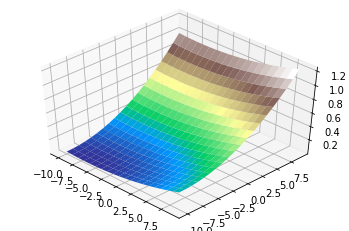

In [420]:
from mpl_toolkits.mplot3d import Axes3D
a_grid,b_grid = np.mgrid[-10:10:1, -10:10:1]

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.view_init(45, -45)
ax.plot_surface(a_grid, b_grid,res, cmap="terrain")

### The Lasso

to perform gradient decsent, it uterize a sibgradient vector g

$g(\theta, J) = \nabla_\theta MSE(\theta) + \alpha[sign(\theta_1) .... sign(\theta_n)]^T$

where $sign(\theta_i))$ 

$= -1 for \theta_i < 0 $

$= 0 for \theta_i=0 $

$= 1 for \theta_i > 0$

In [416]:
from scipy.optimize import minimize

def my_ridge(beta):
    return np.sum((y-X_b@np.array(beta))**2)+a*(np.sum(np.array(beta[1:])**2))

def grid_ridge():
    x_vec = np.arange(-10,10)
    ary = np.empty((len(x_vec),len(x_vec)))
    for i in range(len(x_vec)):
        for j in range(len(x_vec)):
            ary[i,j] = my_ridge([i,j])
    return ary

# a_grid, b_grid
# plt.imshow(grid_ridge())

In [417]:
res = grid_ridge()

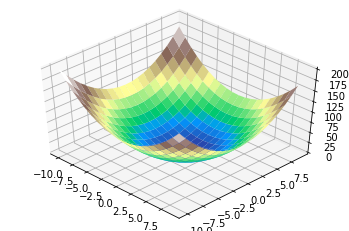

In [421]:
def f(x):
    return x[0]**2+x[1]**2
ary = np.arange(0,10).reshape(5,-1)
ary2 = np.mgrid[-10:10,-10:10]
f(ary2)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.view_init(45, -45)
ax.plot_surface(ary2[0], ary2[1],f(ary2), cmap="terrain")

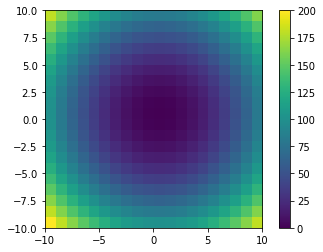

In [424]:
fig, ax = plt.subplots()

im = ax.imshow(f(ary2), origin="lower", extent=[-10,10,-10,10])
fig.colorbar(im)

In [215]:
opt = minimize(my_ridge, np.ones(X_b.shape[1]),method="BFGS",options={"disp":True})

Optimization terminated successfully.
         Current function value: 56566.602057
         Iterations: 6
         Function evaluations: 128
         Gradient evaluations: 32


In [216]:
opt.x[0] + opt.x[1]*1.5
my_ridge(np.array([3.4,1])), my_ridge(np.array([3.38, 0.00000004]))

(84231.5748964655, 56566.78520801504)

actual lasso

In [431]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=1)
lasso_reg.fit(X,y)
c,i = lasso_reg.coef_, lasso_reg.intercept_

In [432]:
1.5*c + i

array([4.31694099])

In [433]:
lasso_reg.predict([[1.5]])

array([4.31694099])

### Logistic Regression

In [442]:
def exp_func(x):
    return 1/(1+np.exp(-3*x+5))

[-2, 4, 0, 1]

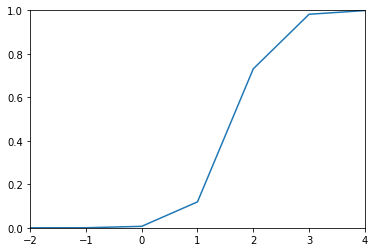

In [445]:
xvec = np.arange(-10,10)
plt.plot(xvec, exp_func(xvec))
plt.axis([-2,4,0,1])

In [475]:
from sklearn import datasets

iris = datasets.load_iris()

list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [480]:
X = iris["data"][:,3:]
y = (iris["target"]==2).astype(np.int)

In [482]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

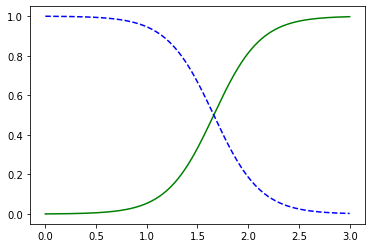

In [485]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1],"g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:,0],"b--", label="Not Iris-Virginica")

In [488]:
log_reg.predict([[1.0]]), log_reg.predict_proba([[1.0]])

(array([0]), array([[0.94591643, 0.05408357]]))

### Softmax Regression (multiclass classification)

In [494]:
X = iris["data"][:,(2,3)]
X[:5,:] ##petal length, petal witdth

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [495]:
y = iris["target"]

In [496]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs",
                                C=10)#C is a regulalization constant
softmax_reg.fit(X,y)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [497]:
softmax_reg.predict([[5,2]])

array([2])

In [498]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])